In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1633,2020-09-14,United Kingdom,367906.0,368504.0,41661.0,41628.0,-598.0,33.0
1634,2020-09-14,Germany,260910.0,260355.0,9359.0,9350.0,555.0,9.0
1635,2020-09-14,Iran,403706.0,402029.0,23270.0,23157.0,1677.0,113.0
1636,2020-09-14,Turkey,290977.0,291162.0,7044.0,7056.0,-185.0,-12.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9799.554945054944
RMSE =  37023.93299178381


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  306.77777777777777
RMSE =  758.4948344711478


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  70580.24516129032
RMSE =  116665.71736602417
-- World performances for deaths --
MAE =  1764.9741935483871
RMSE =  2148.184011761352


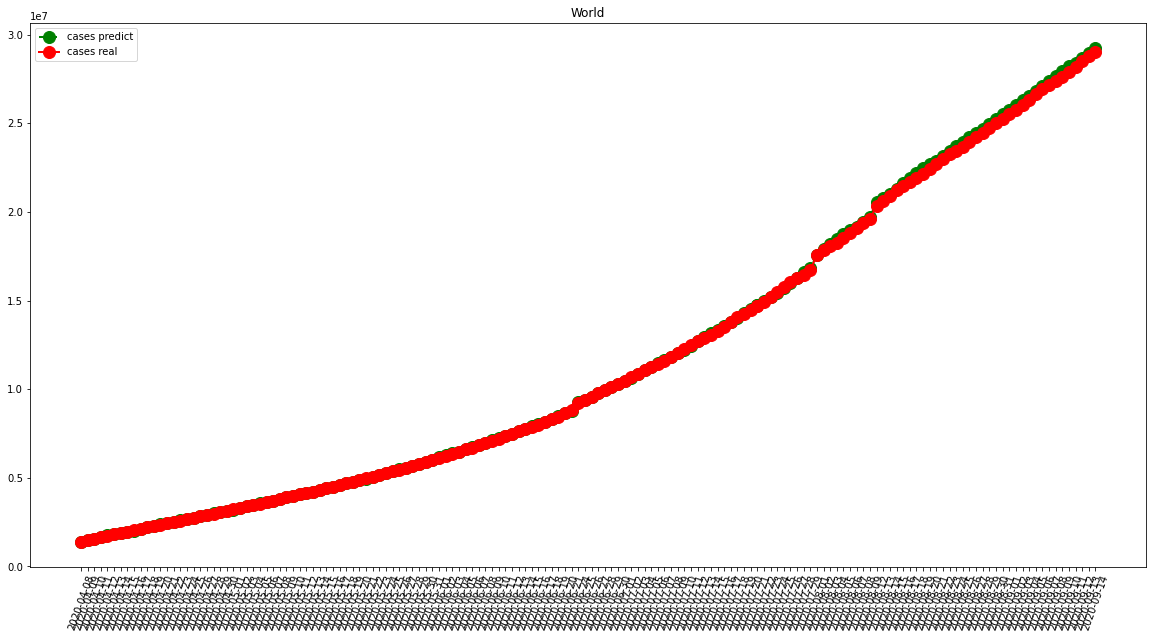

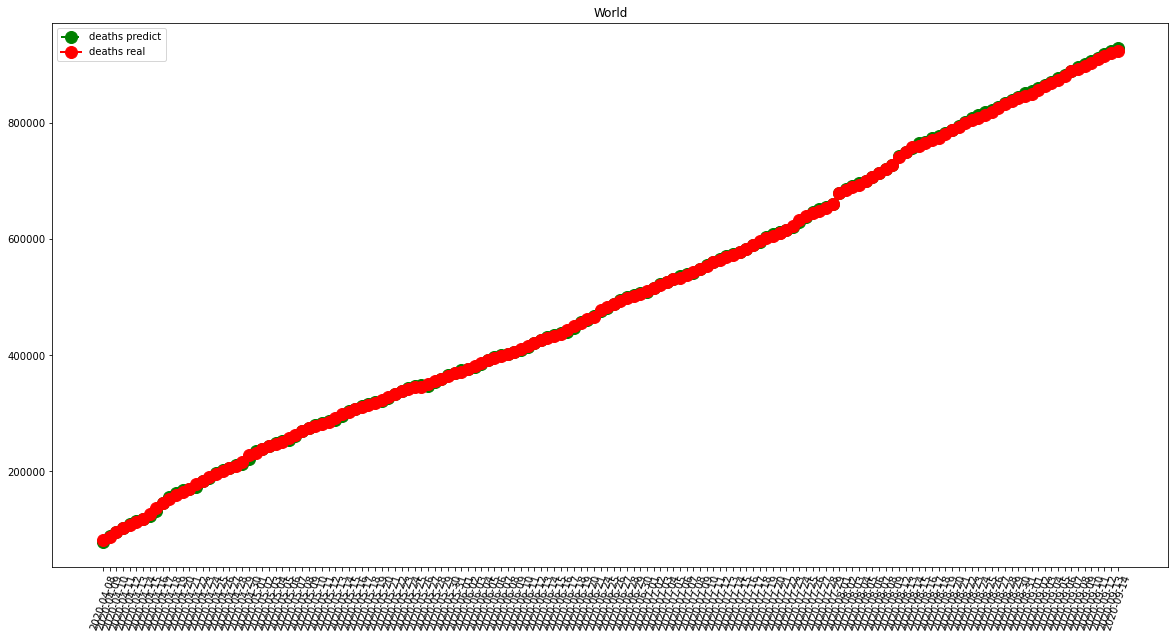

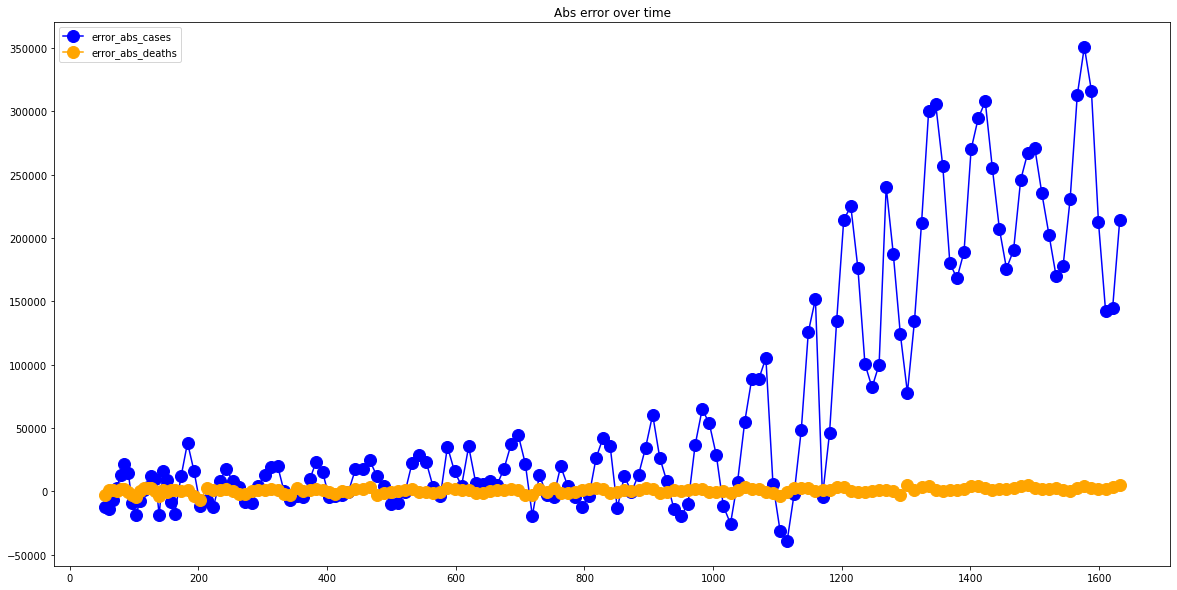

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1082.0545454545454
RMSE =  1603.2968703722509
-- France performances for deaths --
MAE =  115.01818181818182
RMSE =  261.27255013595567


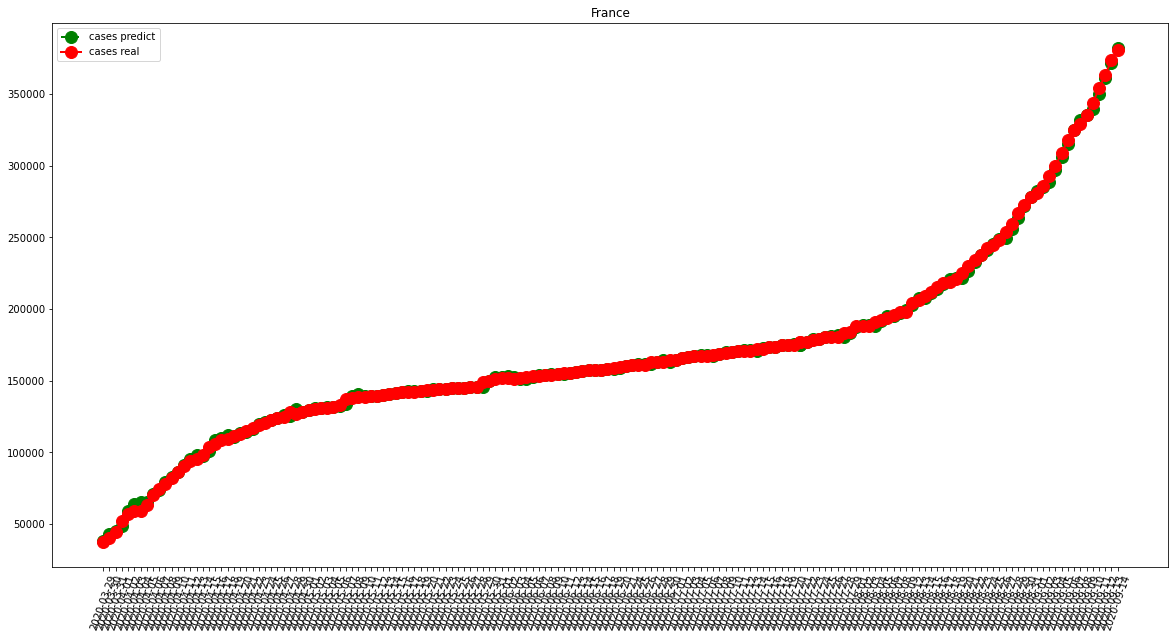

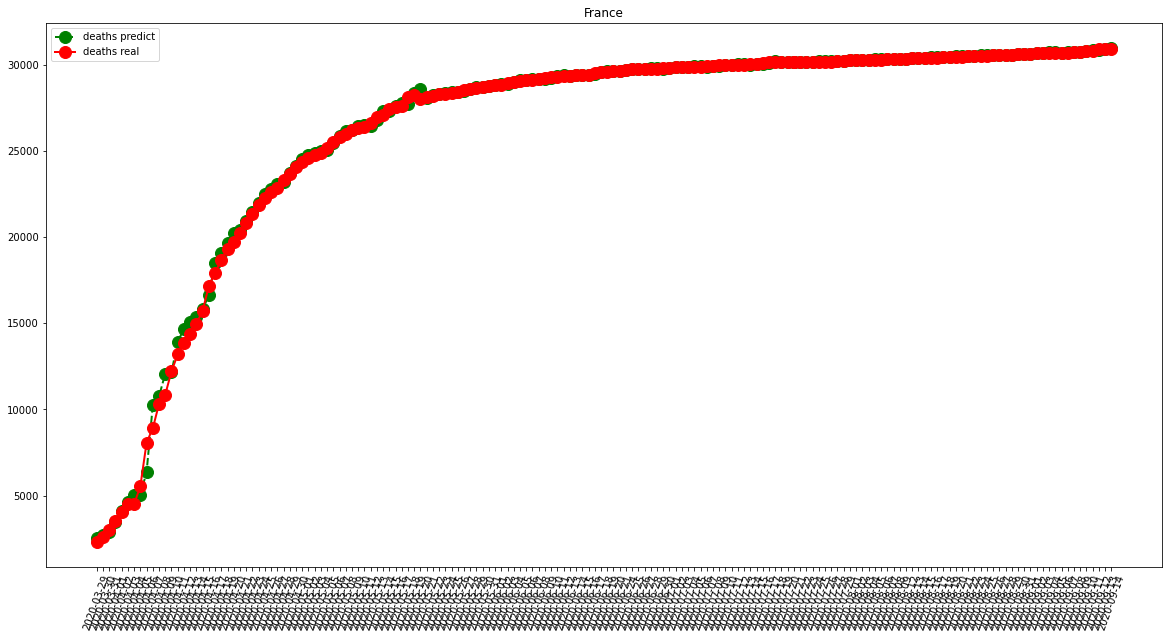

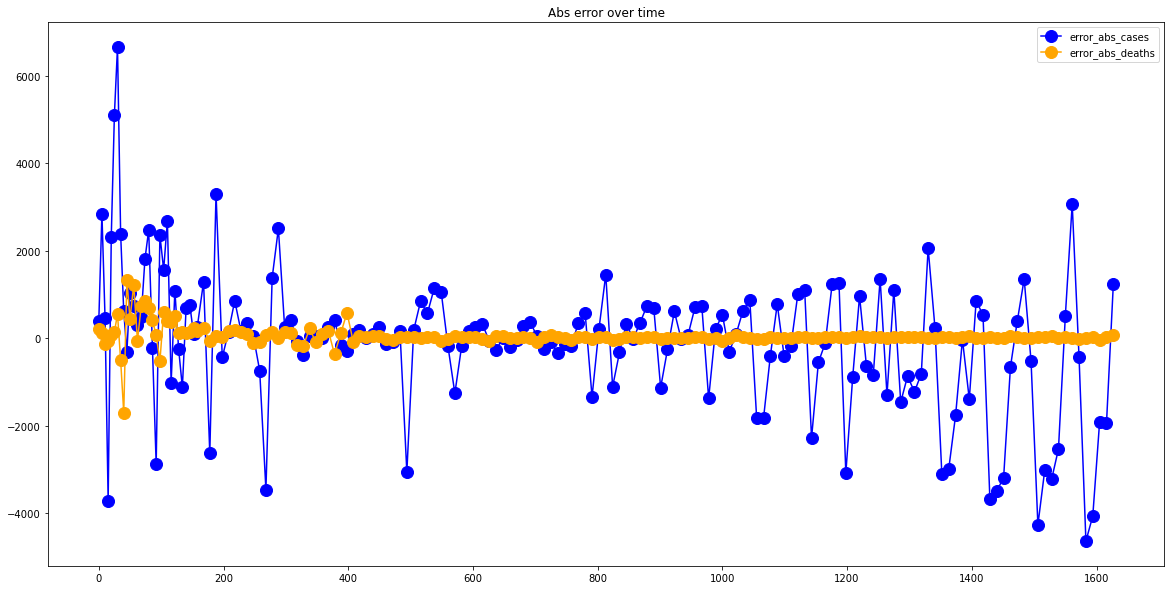

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.6121212121212
RMSE =  449.3316653147711
-- Italy performances for deaths --
MAE =  68.92727272727272
RMSE =  231.15364167714523


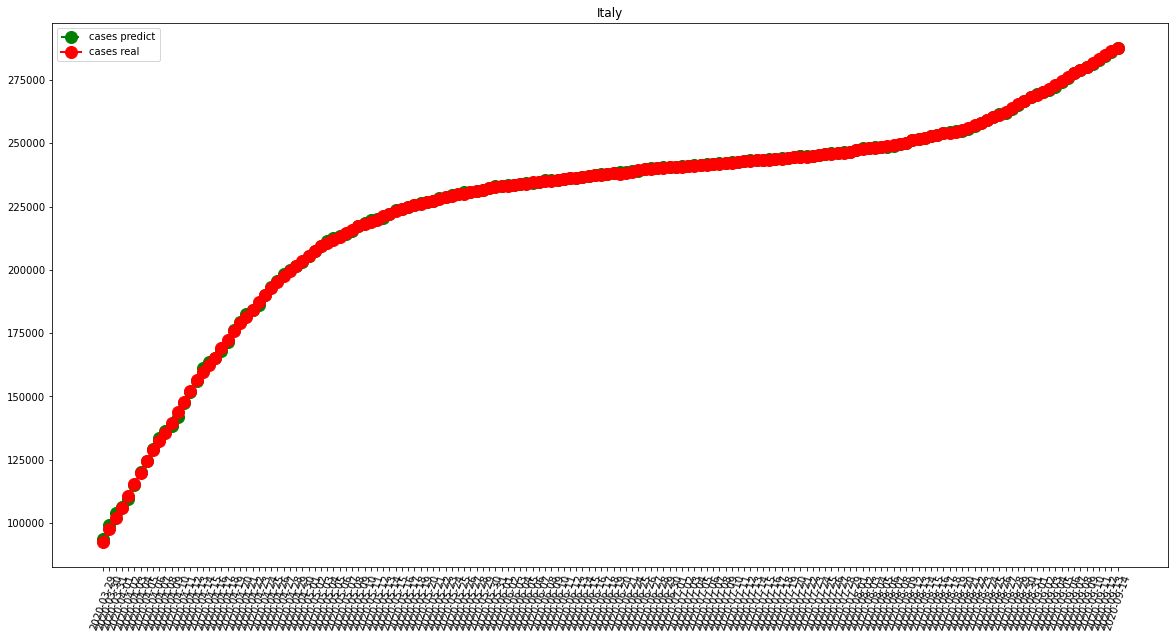

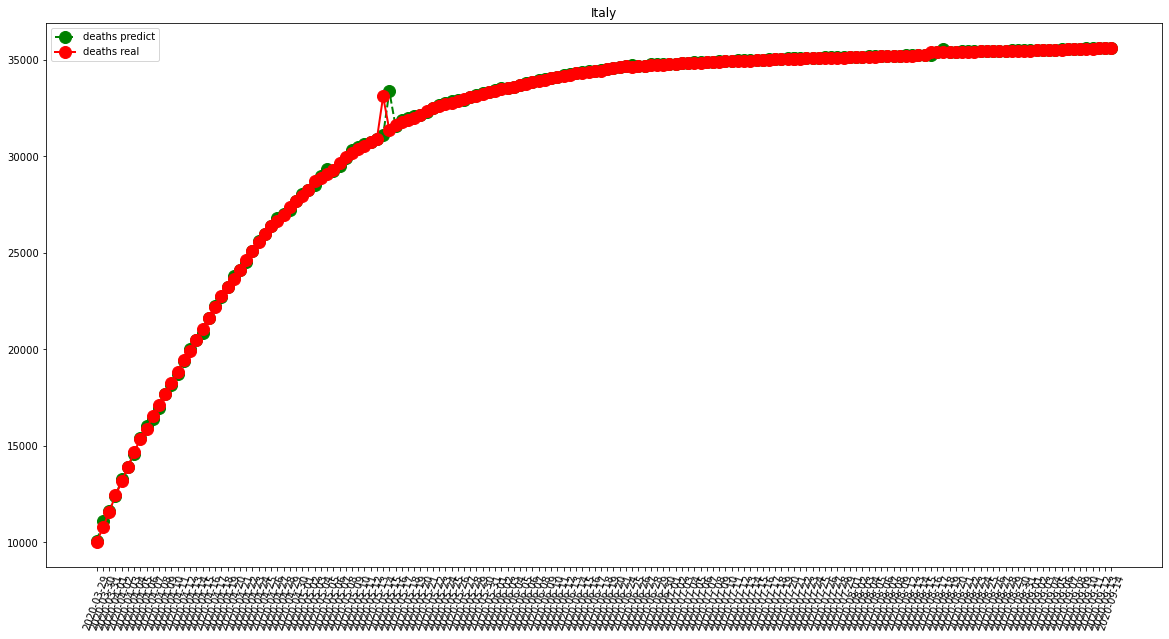

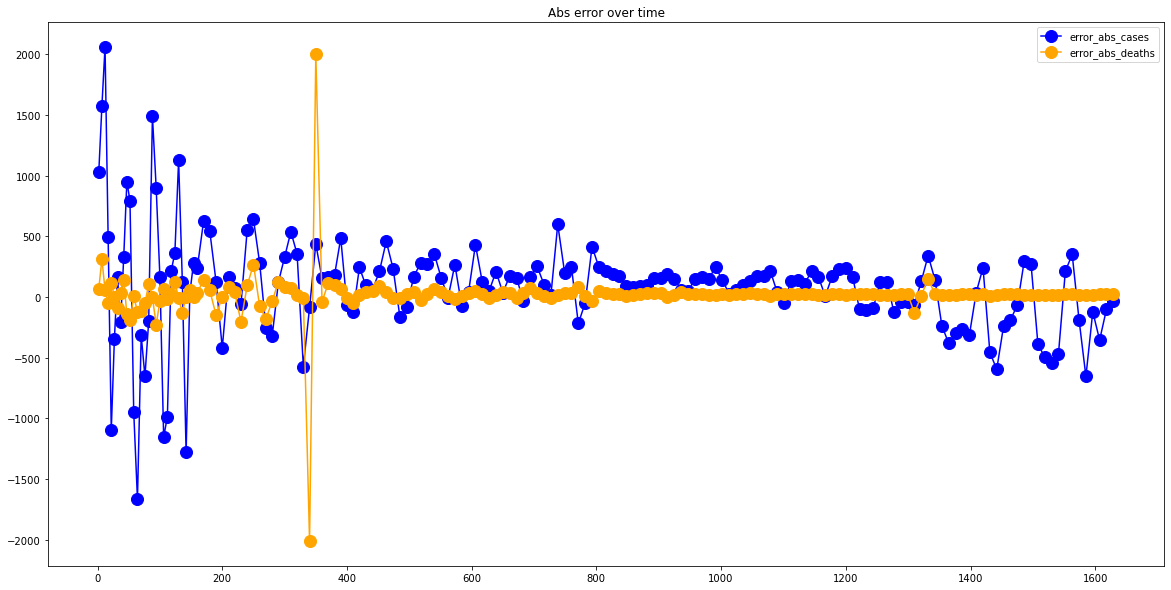

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2323.139393939394
RMSE =  4460.589149836192
-- Spain performances for deaths --
MAE =  120.93939393939394
RMSE =  316.9981263686145


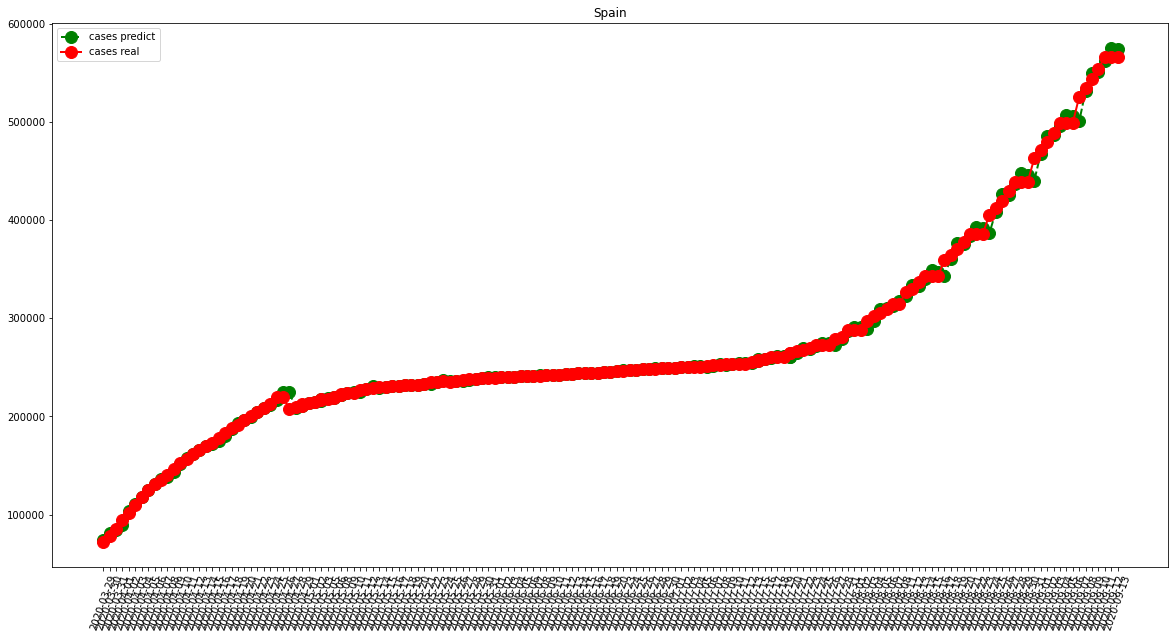

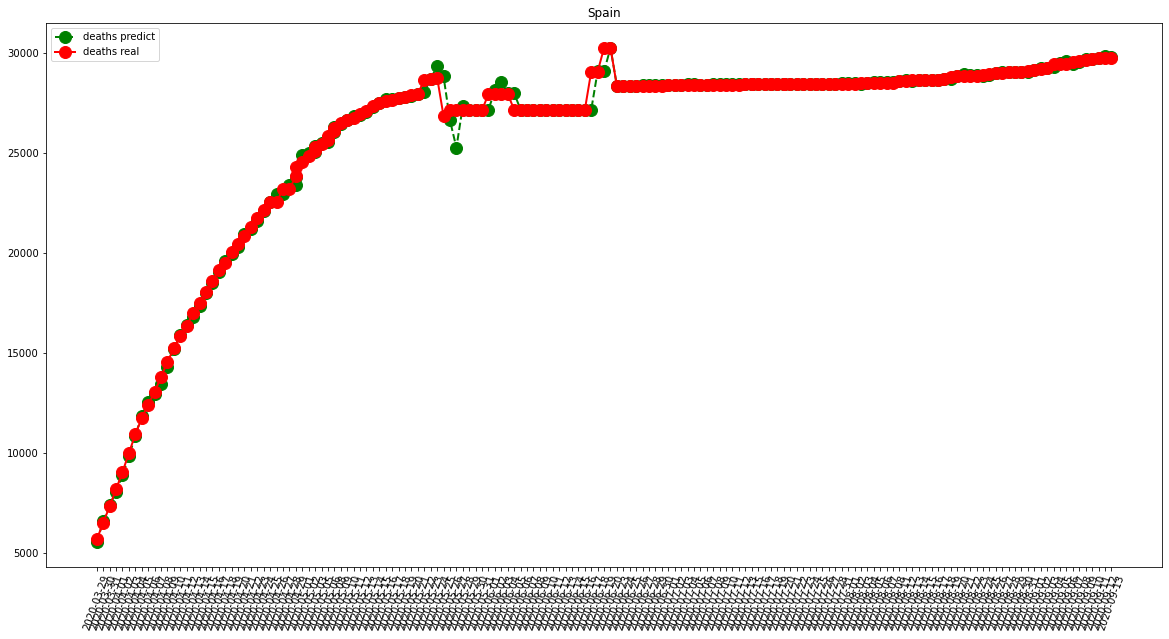

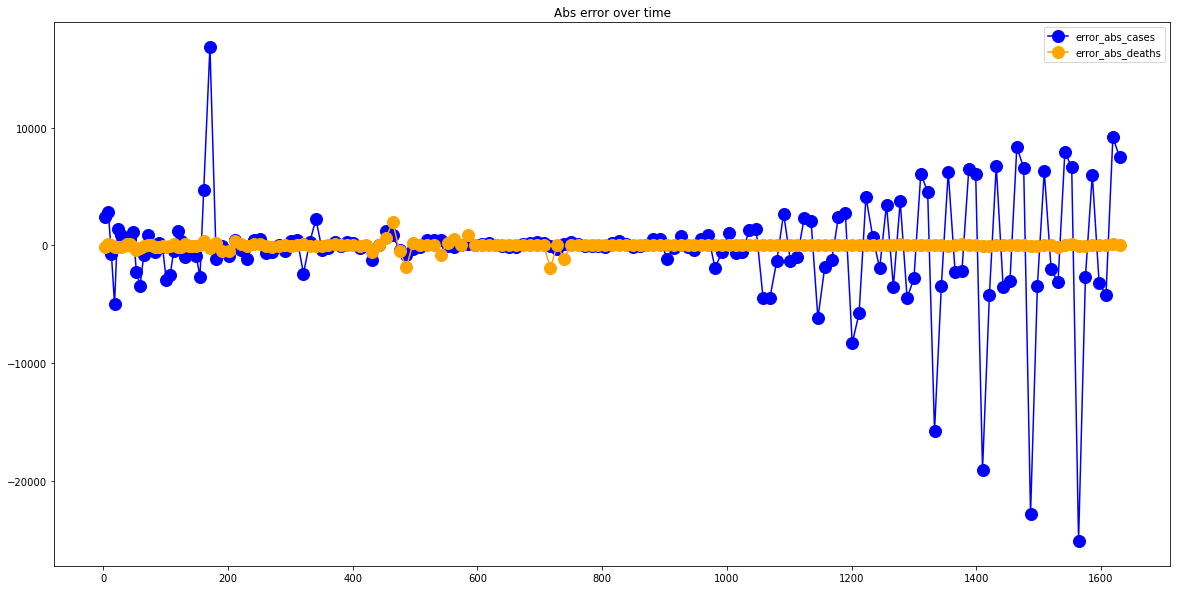

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  14668.60606060606
RMSE =  22291.298790280835
-- United States performances for deaths --
MAE =  483.6545454545454
RMSE =  679.6091969698914


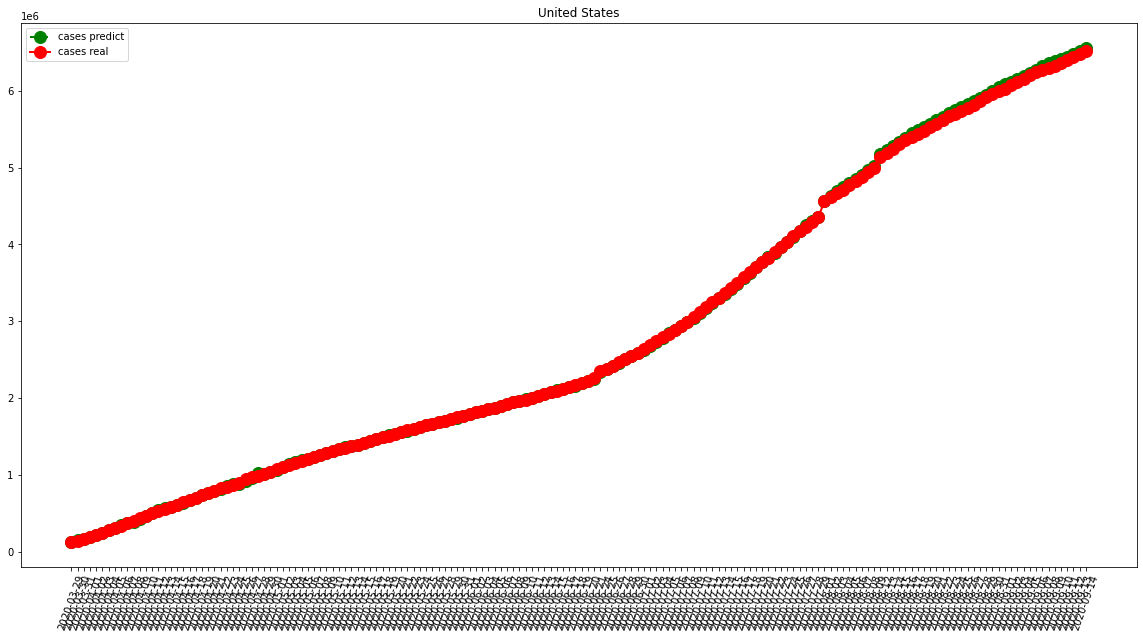

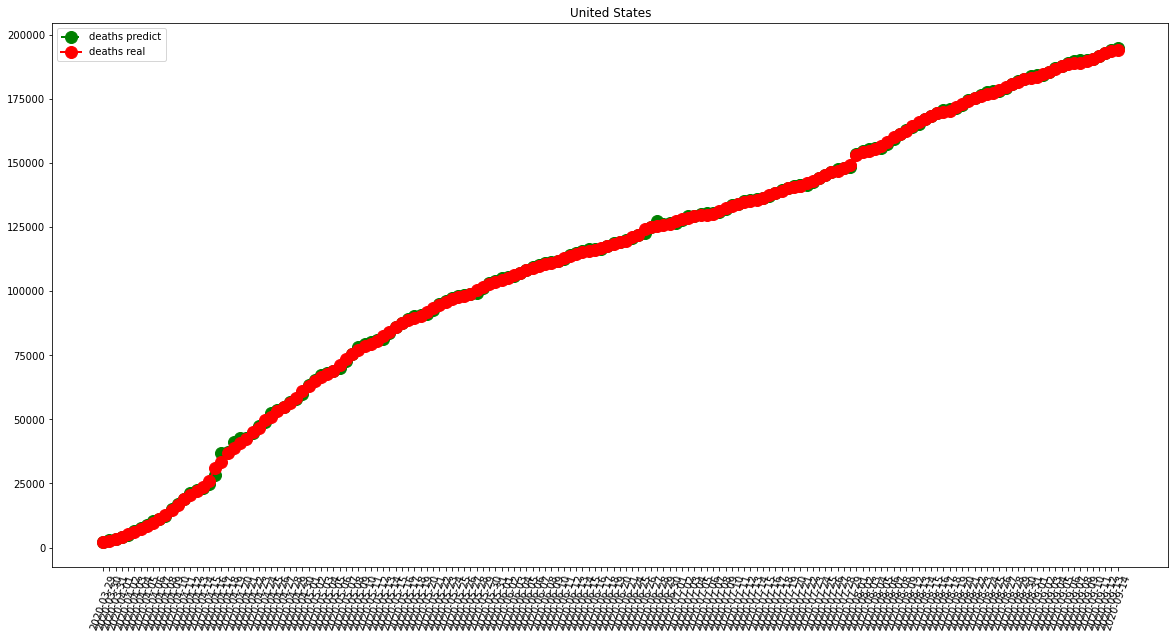

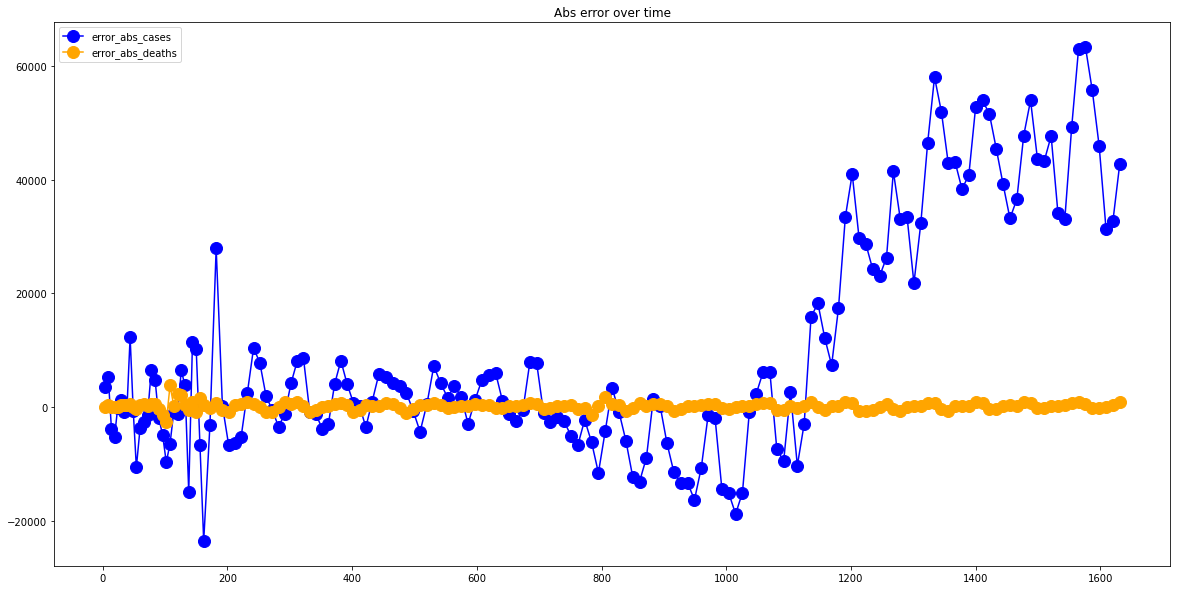

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  61.27272727272727
RMSE =  92.92636380978807
-- China performances for deaths --
MAE =  25.66060606060606
RMSE =  122.25160344737628


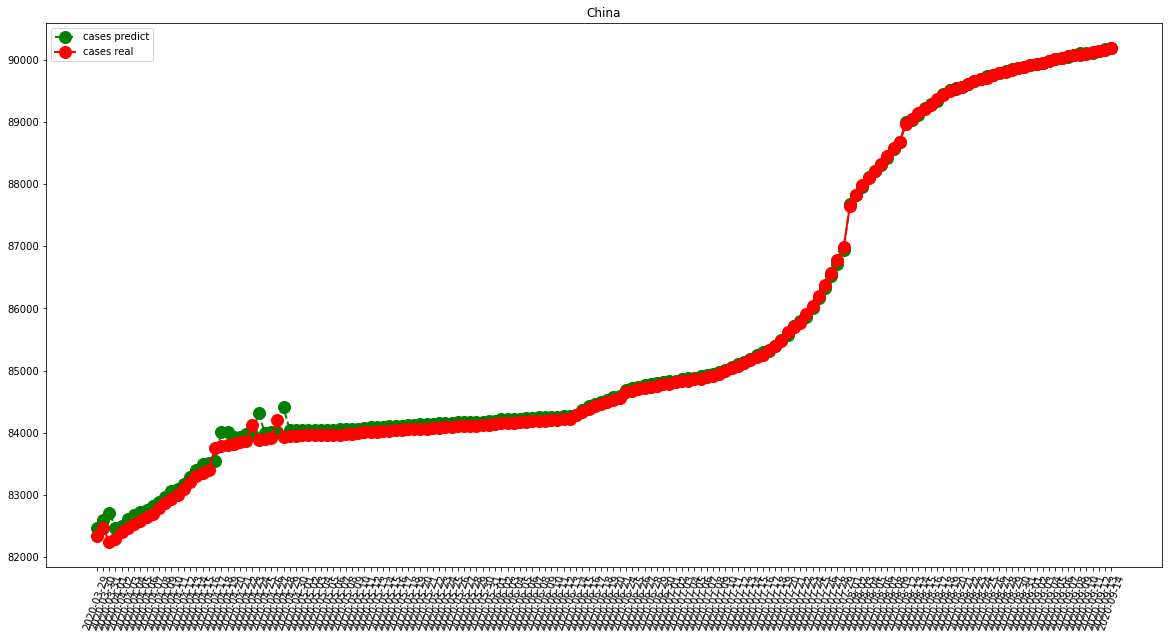

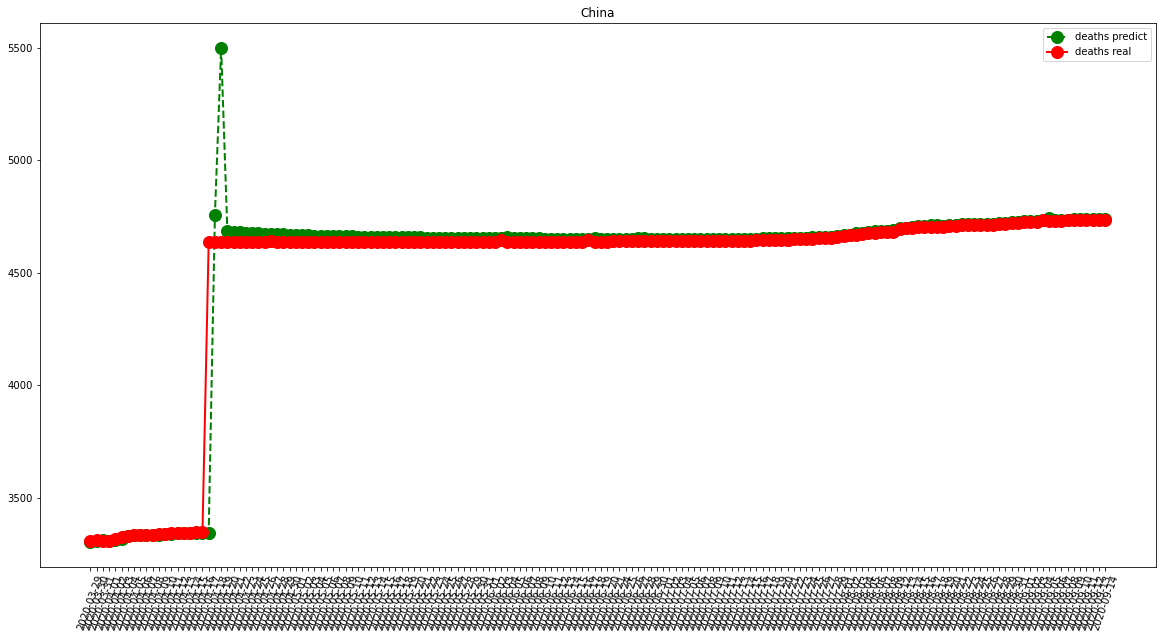

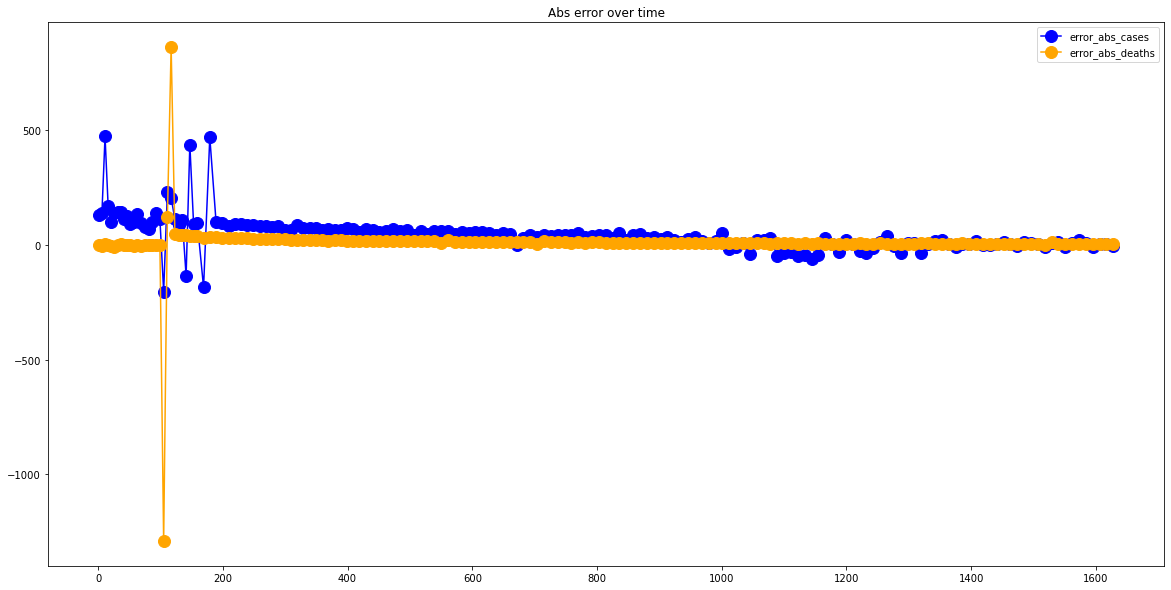

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1020.5547445255474
RMSE =  3580.9755715161787
-- United Kingdom performances for deaths --
MAE =  223.76642335766422
RMSE =  729.1918234103199


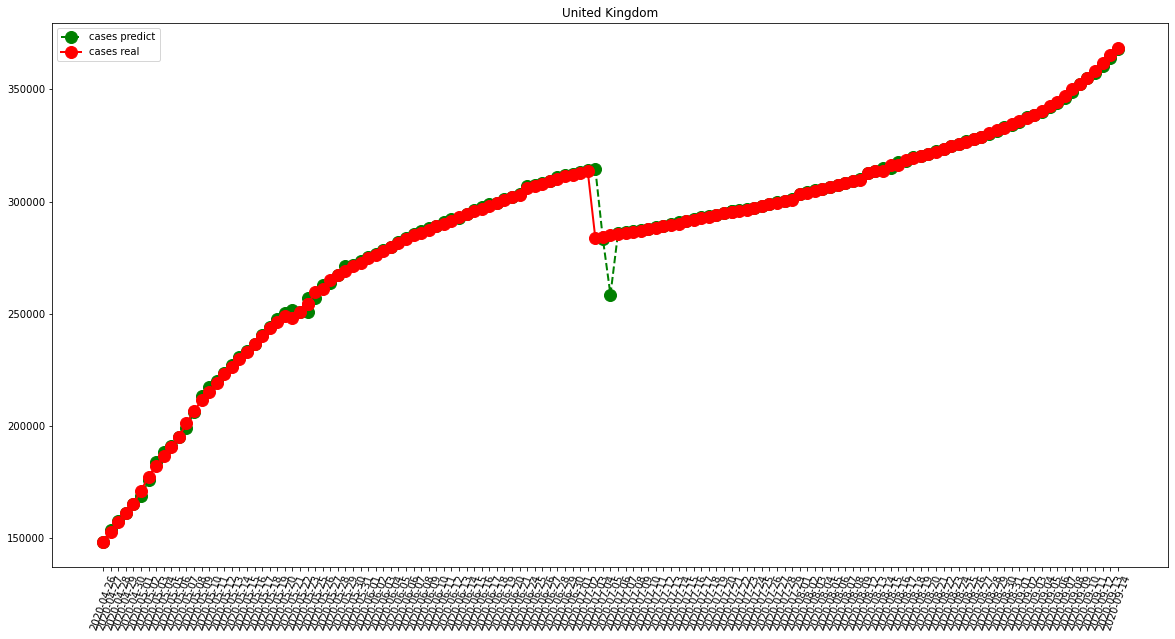

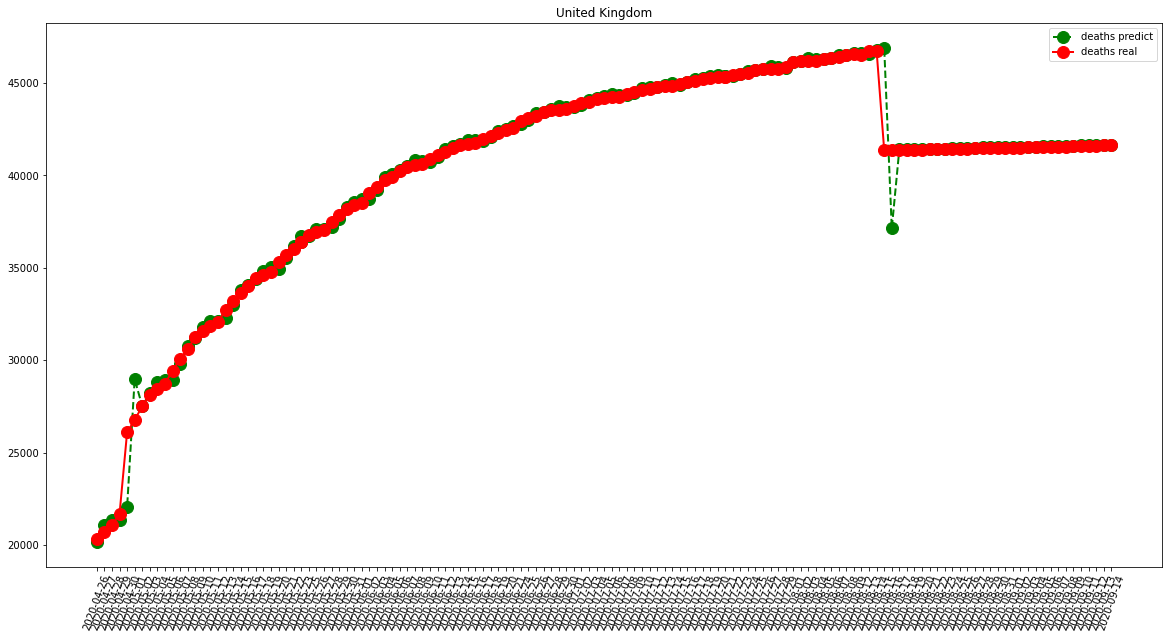

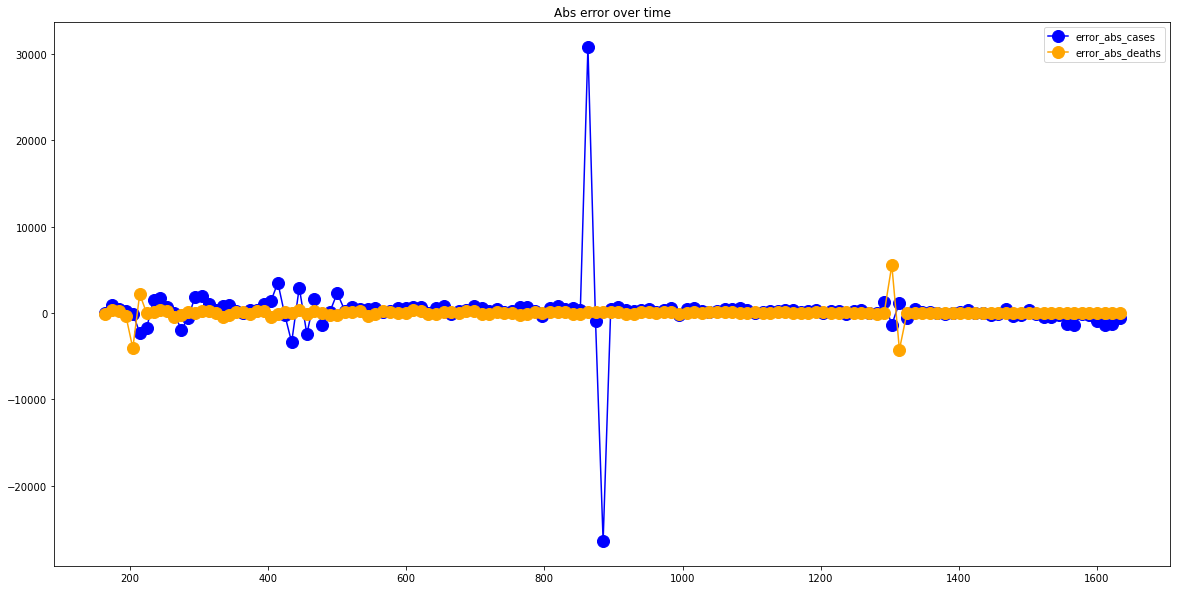

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  405.5109489051095
RMSE =  579.1119995555239
-- Germany performances for deaths --
MAE =  19.642335766423358
RMSE =  37.620948505099626


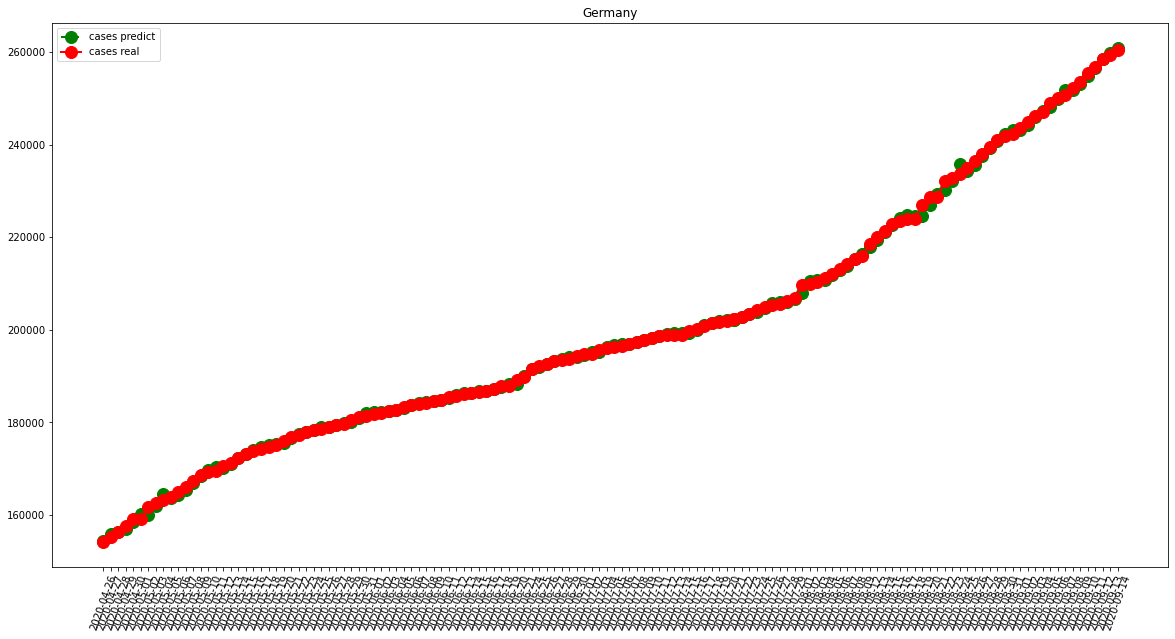

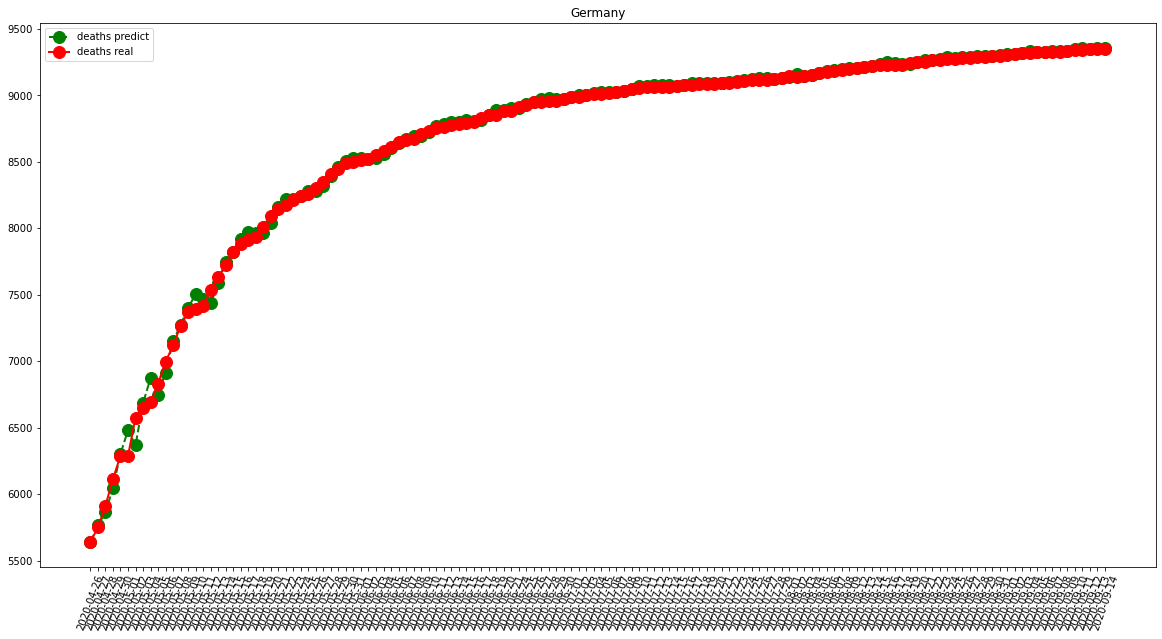

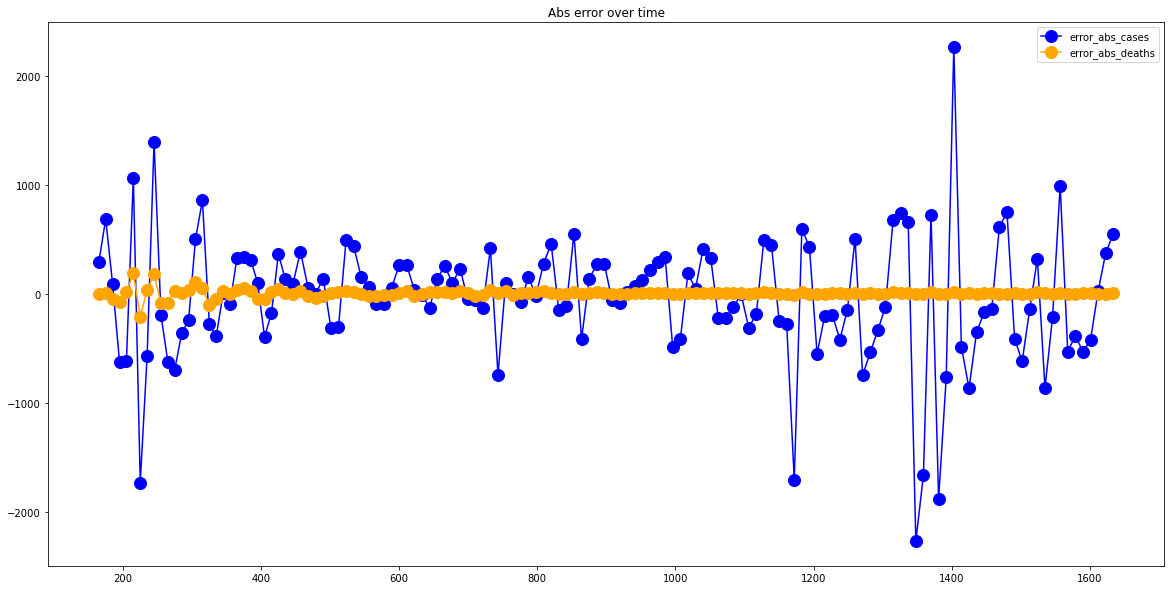

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  892.6861313868613
RMSE =  1252.780265713259
-- Iran performances for deaths --
MAE =  51.737226277372265
RMSE =  86.55532807122995


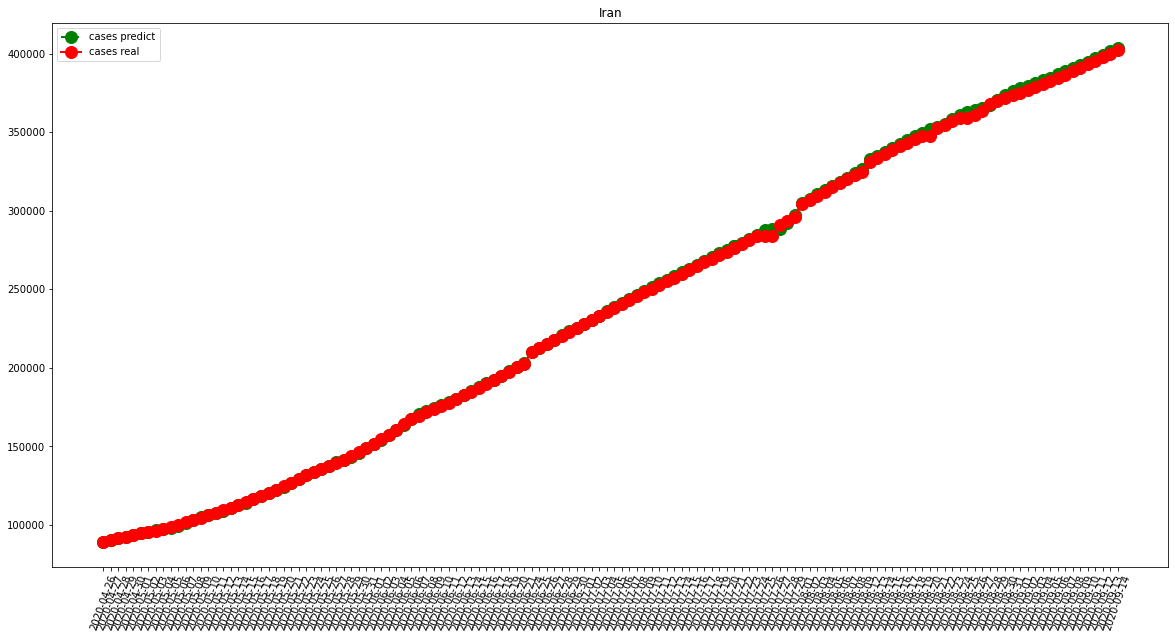

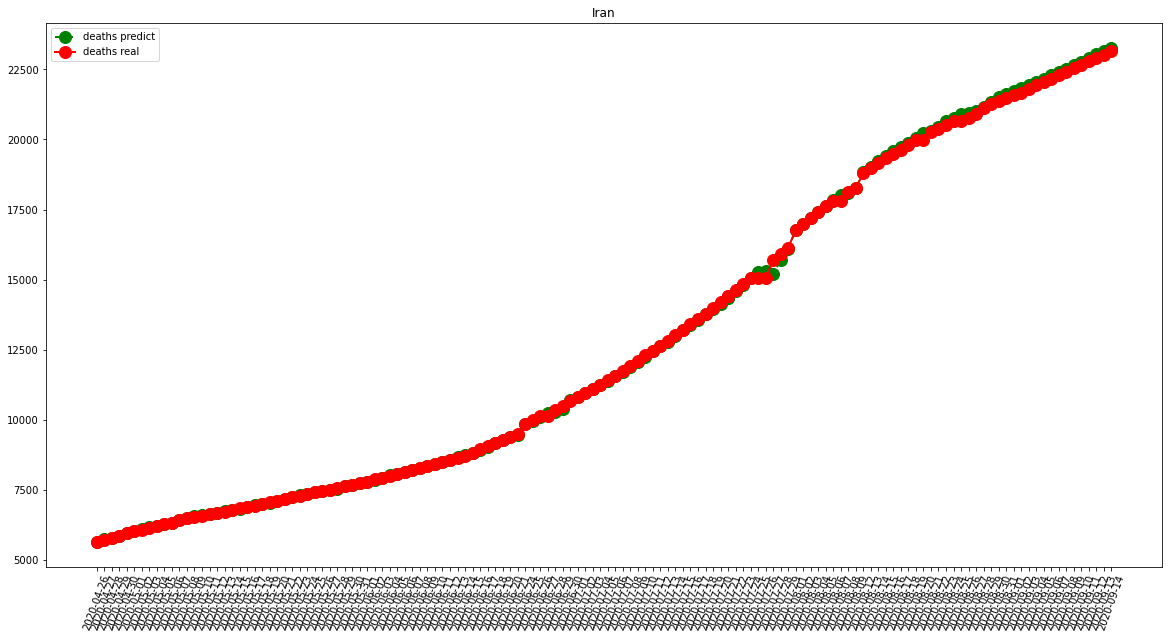

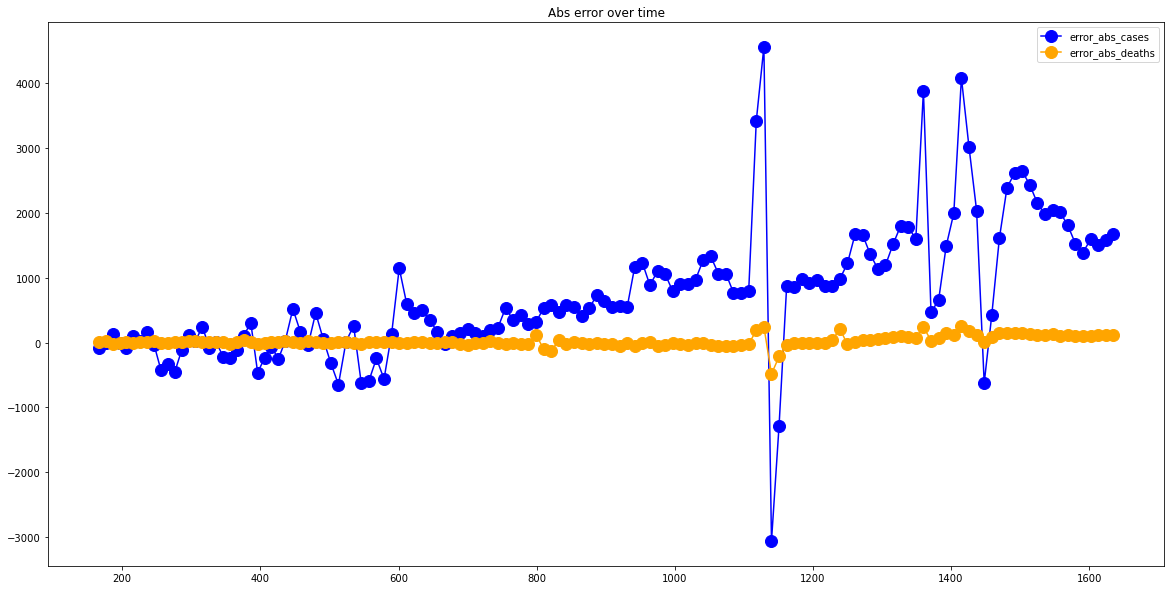

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  212.3065693430657
RMSE =  325.66188636924744
-- Turkey performances for deaths --
MAE =  15.897810218978103
RMSE =  86.86578286976203


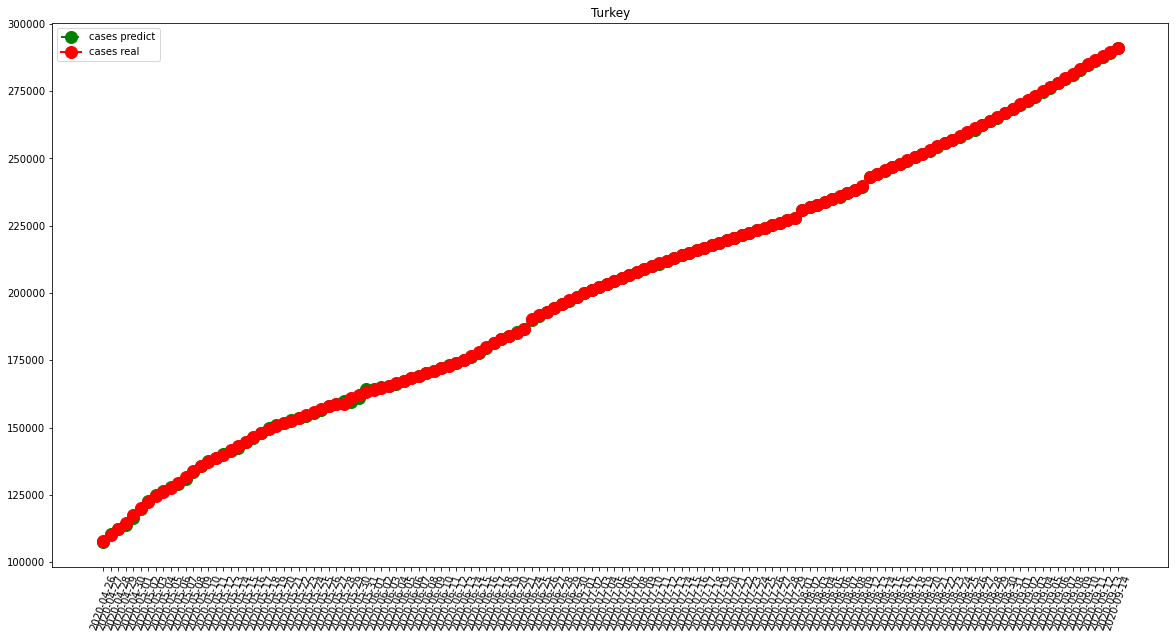

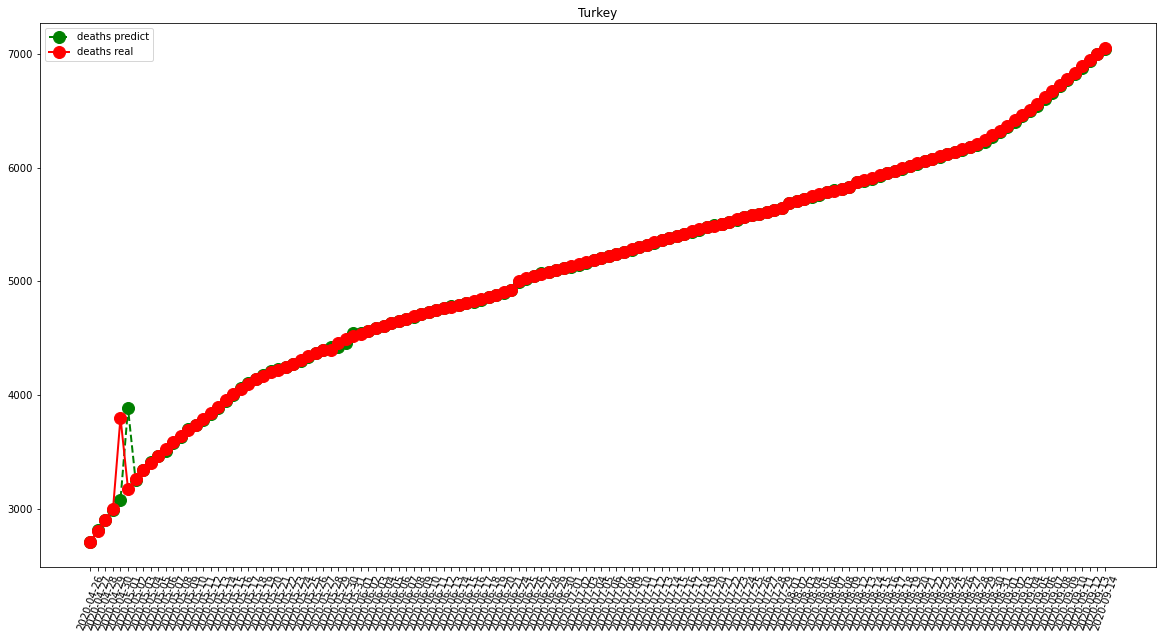

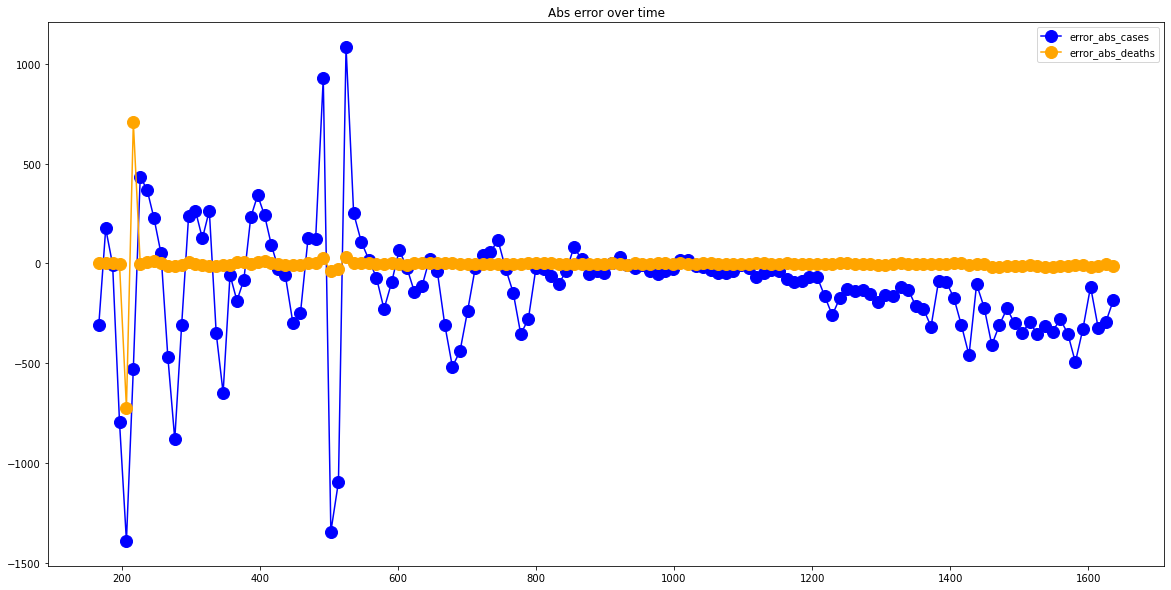

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  15659.954545454546
RMSE =  20861.671564901462
-- Brazil performances for deaths --
MAE =  472.5
RMSE =  577.2428904243469


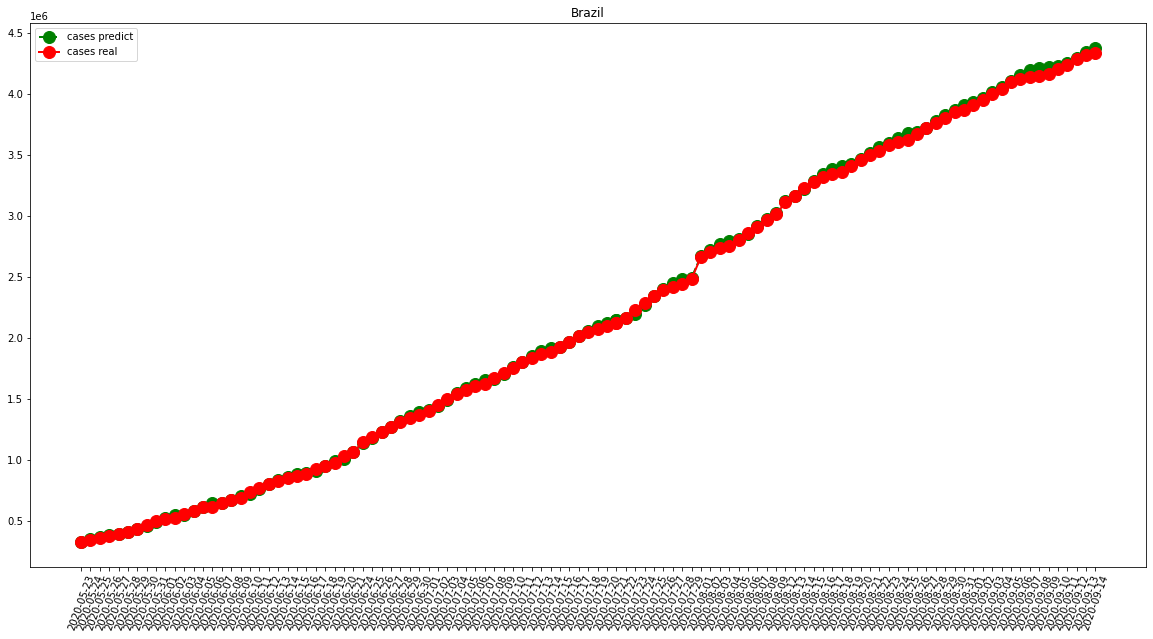

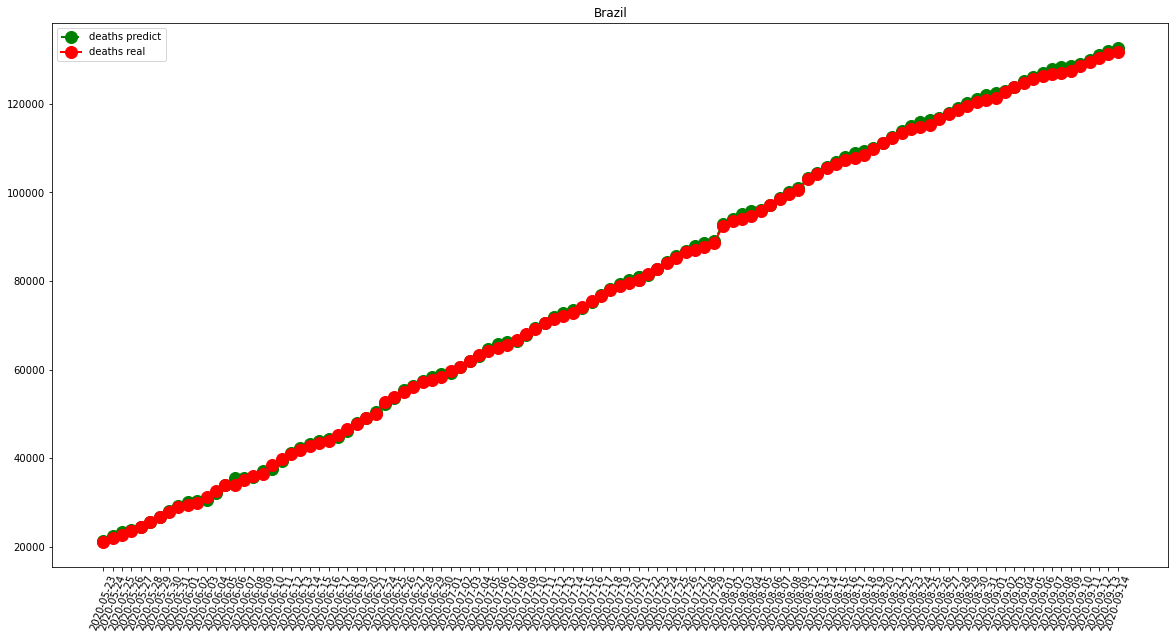

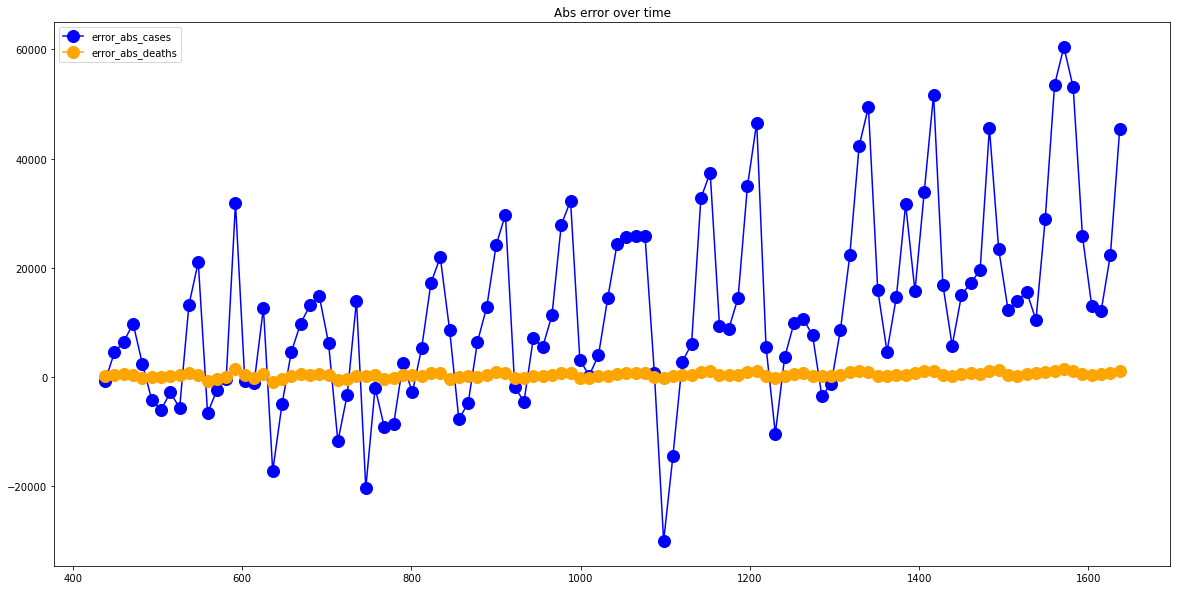

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)